<a href="https://colab.research.google.com/github/RylieWeaver9/Machine-Learning-Data-Science/blob/main/ML_HW_3_Part_1_Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project HW 3 Part 1 Problem 3

## 1. Create a training dataset using  a third order polynomial  y=p(x) for x  taking randomly  from some interval [a,b] of your choice (add some small noise to your dataset)



In [117]:
# Ignore warningx that aren't helpful

import warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.linalg.decomp_lu import LinAlgWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="Singular matrix in solving dual problem. Using least-squares solution instead.")
warnings.filterwarnings("ignore", category=LinAlgWarning, message="^Ill-conditioned matrix.*")

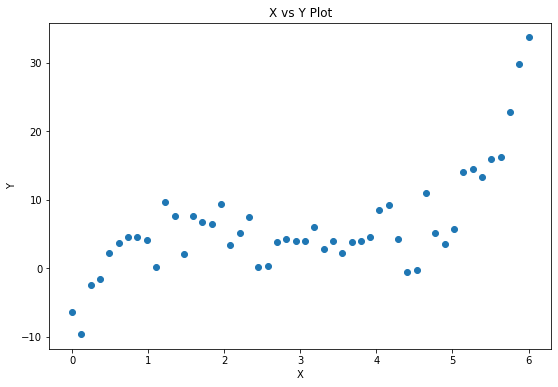

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Generate an independent variable
# range [0, 6], 50 points
num_pts = 50
x = np.linspace(0, 6, num_pts)
X = np.array(x).reshape(-1,1)

# Generate a normally distributed error
# mean=0, var=3, 50 points
e = np.random.normal(0, 3, num_pts)
E = np.array(e).reshape(-1,1)

# Generate dependent variable (3rd degree polynomial)
Y = X**3 - 8*(X**2) + 18*X - 6 + E

# Plot
plt.figure(figsize = (9,6))
plt.scatter(X,Y)

# Label plot
plt.title('X vs Y Plot')
plt.xlabel('X')
plt.ylabel('Y')

# Show
plt.show()

In [119]:
# Shuffle X and Y
index = np.linspace(0, len(X)-1, len(X), dtype=int)
np.random.shuffle(index)
X_shuffle = np.array(X)[index]
Y_shuffle =  np.array(Y)[index]

In [120]:
# Check My Shuffling
print(index[:10])
print(X[index[1]])
print(Y[index[1]])
print(X_shuffle[1])
print(Y_shuffle[1])

[14  6 12 43 34 37 18 23 24  2]
[0.73469388]
[5.88826814]
[0.73469388]
[5.88826814]


## 2. Run polynomial regression for a second order polynomial model.  Plot learning curves : training error and cross validation error (changing size of training data, not using any regularization)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 39 instead of 40.
  warnings.warn(


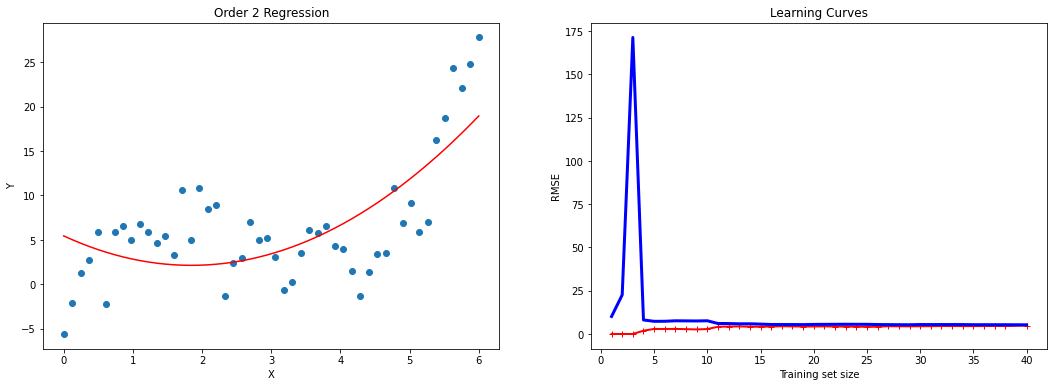

In [121]:
from numpy.random.mtrand import RandomState
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Make Polynomial Array
X_poly2 = PolynomialFeatures(2)
data2 = X_poly2.fit_transform(X)

# Select The Model and Train
model2 = LinearRegression()
model2.fit(data2, Y)

# Make data2 from Shuffled Data
data2_shuffle = X_poly2.fit_transform(X_shuffle)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data2_shuffle, Y_shuffle, train_sizes = np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model2.predict(data2), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

# Label plots
axs[0].set_title('Order 2 Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')
# axs[1].set_ylim(-1,7)

#Show
plt.show()

### I experimented by doing third-order regression as well.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 39 instead of 40.
  warnings.warn(


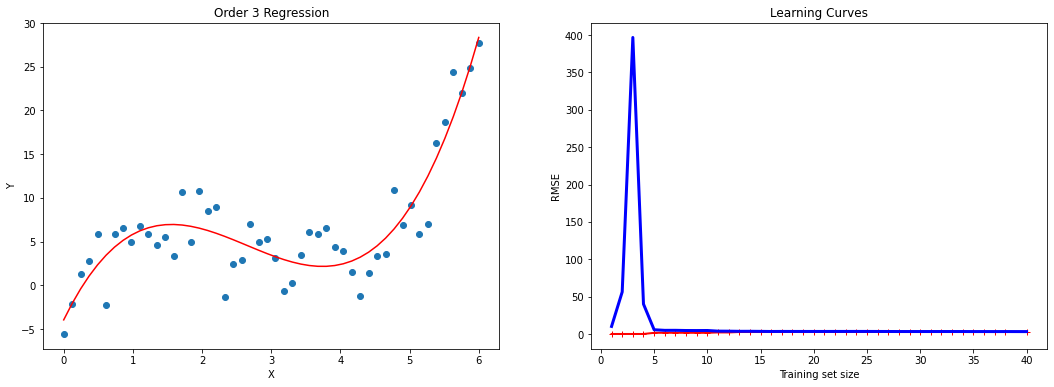

In [122]:
# Make Polynomial Array
X_poly3 = PolynomialFeatures(3)
data3 = X_poly3.fit_transform(X)

# Select The Model and Train
model3 = LinearRegression()
model3.fit(data3, Y)

# Make data3 from Shuffled Data
data3_shuffle = X_poly3.fit_transform(X_shuffle)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data3_shuffle, Y_shuffle, train_sizes = np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model3.predict(data3), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
# axs[1].set_ylim(0, 20)

# Label plots
axs[0].set_title('Order 3 Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')

#Show
plt.show()

## 3. Run polynomial regression for a 6-th order polynomial model.  Plot learning curves : training error and cross validation error   (changing size of training data, not using any regularization )

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 39 instead of 40.
  warnings.warn(


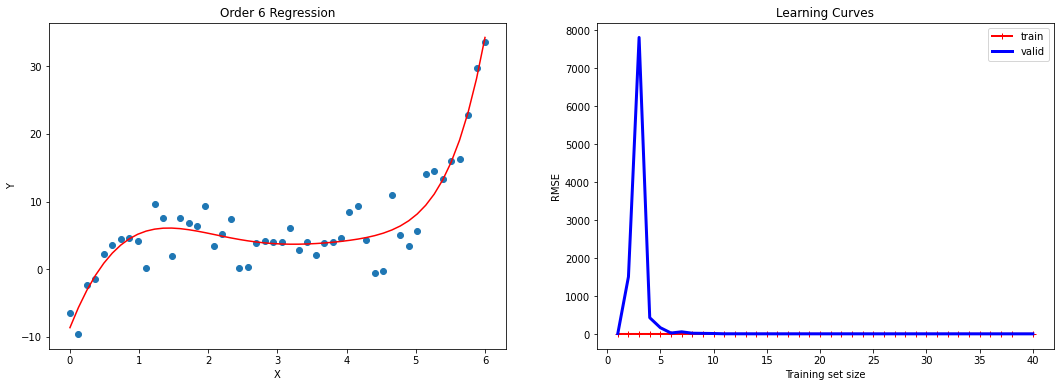

In [145]:
# Make Polynomial Array
X_poly6 = PolynomialFeatures(6)
data6 = X_poly6.fit_transform(X)

# Select The Model and Train
model6 = LinearRegression()
model6.fit(data6, Y)

# Make data6 from Shuffled Data
data6_shuffle = X_poly6.fit_transform(X_shuffle)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data6_shuffle, Y_shuffle, train_sizes = np.linspace(0.01, 1.0, 40), cv=5, 
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model6.predict(data6), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
# axs[1].set_ylim(0, 20)

# Label plots
axs[0].set_title('Order 6 Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')
axs[1].legend()

#Show
plt.show()

## 4. Introduce L1 regularization.  Plot cross validation error vs regularizing parameter lambda, find the best value of lambda.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 39 instead of 40.
  warnings.warn(


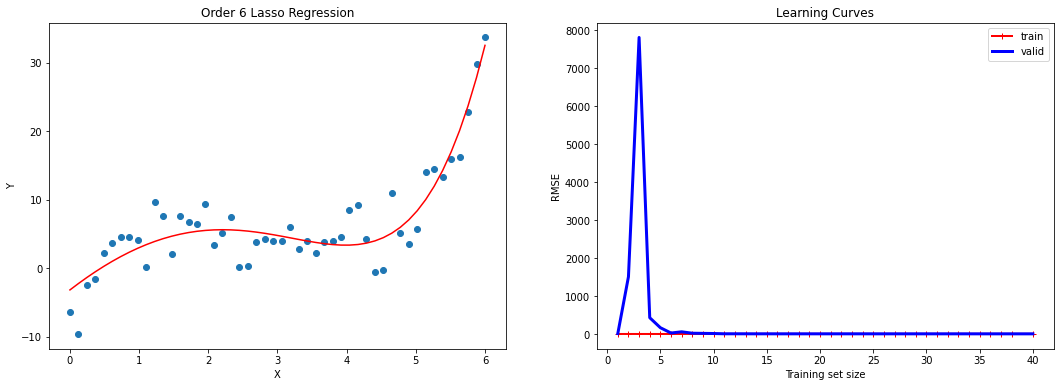

[[ 0.00000000e+00  2.60155656e+01 -1.43272839e+01  1.67816206e+00
   7.61907622e-01 -2.38040138e-01  1.93696384e-02]]
[ 0.00000000e+00  7.76619559e+00 -1.43670155e+00 -1.77936259e-01
  1.13719017e-02  3.70400256e-03  7.65087066e-04]


In [146]:
from sklearn.linear_model import Lasso

# Select The Model and Train
model6_lasso = Lasso(alpha=0.1)
model6_lasso.fit(data6, Y)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data6_shuffle, Y_shuffle, train_sizes = np.linspace(0.01, 1.0, 40), cv=5, 
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model6_lasso.predict(data6), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
# axs[1].set_ylim(0, 20)

# Label plots
axs[0].set_title('Order 6 Lasso Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')
axs[1].legend()

#Show
plt.show()

# Print Coefficients of Regularized and Non-Regularized Models
print(model6.coef_)
print(model6_lasso.coef_)

### Finding Best Value of Lambda

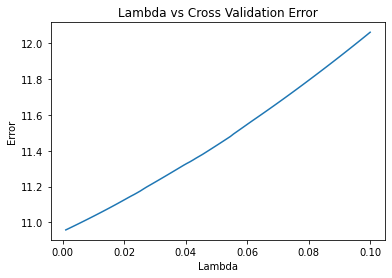

In [125]:
from sklearn.model_selection import cross_val_score

# Lambda Values
lmbd = np.linspace(0, 0.1, 100)[1:]

# Cross Validation Errors
lasso_rmses = []
for alpha in lmbd:
    model6_lasso.set_params(alpha=alpha)
    mse = np.mean(cross_val_score(model6_lasso, data6_shuffle, Y_shuffle, cv=5, scoring='neg_mean_squared_error'))
    lasso_rmses.append(-mse)

# Plot
plt.plot(lmbd, lasso_rmses)

# Label plot
plt.title('Lambda vs Cross Validation Error')
plt.xlabel('Lambda')
plt.ylabel('Error')

#Show
plt.show()

### Best value for lambda is 0

## 5. For the best value of lambda run polynomial regression for 10th order polynomial model. Comment on your result.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 39 instead of 40.
  warnings.warn(


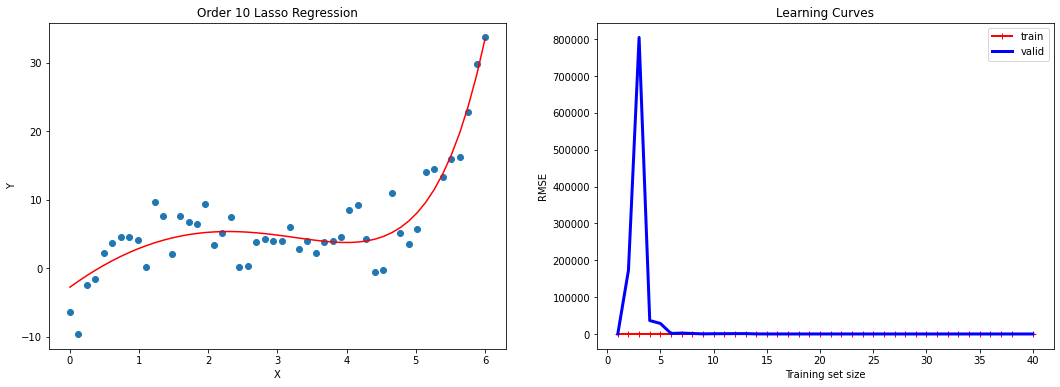

[ 0.00000000e+00  7.29505616e+00 -1.57507982e+00 -7.85930007e-02
  1.66055916e-02  2.04722463e-03  1.33272608e-04  1.17987490e-05
  2.42074042e-06  6.23667935e-07  1.45303422e-07]


In [147]:
# Make Polynomial Array
X_poly10 = PolynomialFeatures(10)
data10 = X_poly10.fit_transform(X)

# Make data6 from Shuffled Data
data10_shuffle = X_poly10.fit_transform(X_shuffle)

# Select The Model and Train
model10_lasso = Lasso(alpha=0.1)
model10_lasso.fit(data10, Y)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data10_shuffle, Y_shuffle, train_sizes = np.linspace(0.01, 1.0, 40), cv=5, 
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model10_lasso.predict(data10), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
# axs[1].set_ylim(0, 20)

# Label plots
axs[0].set_title('Order 10 Lasso Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')
axs[1].legend()

#Show
plt.show()

# Print Coefficients
print(model10_lasso.coef_)

## 6. Repeat 4,5 for L2 regularization.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 39 instead of 40.
  warnings.warn(


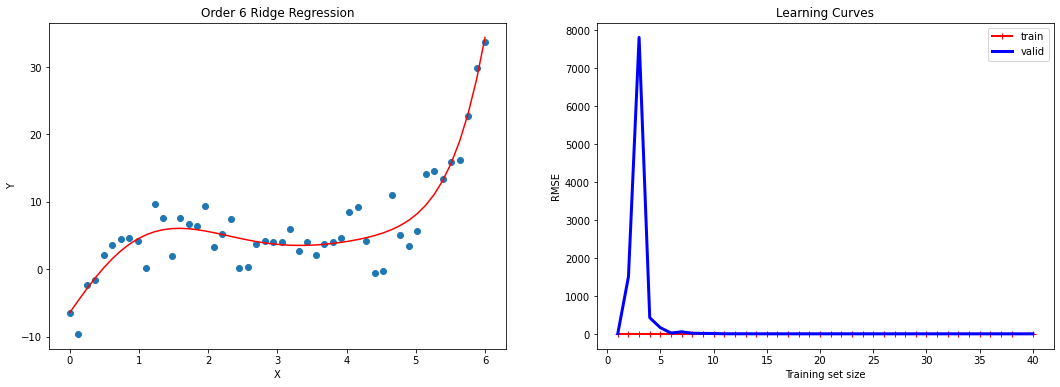

[[ 0.00000000e+00  2.60155656e+01 -1.43272839e+01  1.67816206e+00
   7.61907622e-01 -2.38040138e-01  1.93696384e-02]]
[[ 0.         14.53370083  0.38793176 -6.32525328  2.88798386 -0.51094508
   0.03292505]]


In [148]:
from sklearn.linear_model import Ridge

# Select The Model and Train
model6_ridge = Ridge(alpha=0.1)
model6_ridge.fit(data6, Y)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data6_shuffle, Y_shuffle, train_sizes = np.linspace(0.01, 1.0, 40), cv=5, 
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model6_ridge.predict(data6), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
# axs[1].set_ylim(0, 20)

# Label plots
axs[0].set_title('Order 6 Ridge Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')
axs[1].legend()

#Show
plt.show()

# Print Coefficients of Regularized and Non-Regularized Models
print(model6.coef_)
print(model6_ridge.coef_)

### Finding Best Value of Lambda

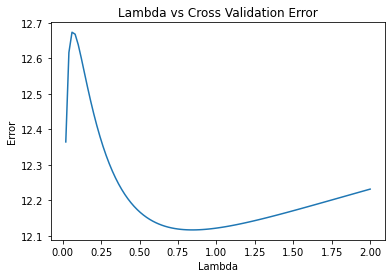

In [154]:
# Lambda Values
lmbd = np.linspace(0, 2, 100)[1:]

# Cross Validation Errors
ridge_rmses = []
for alpha in lmbd:
    model6_ridge.set_params(alpha=alpha)
    mse = np.mean(cross_val_score(model6_ridge, data6_shuffle, Y_shuffle, cv=5, scoring='neg_mean_squared_error'))
    ridge_rmses.append(-mse)

# Plot
plt.plot(lmbd, ridge_rmses)

# Label plot
plt.title('Lambda vs Cross Validation Error')
plt.xlabel('Lambda')
plt.ylabel('Error')

#Show
plt.show()

### Run 10th degree regression for best lambda value (0.8 - higher than I expected)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 39 instead of 40.
  warnings.warn(


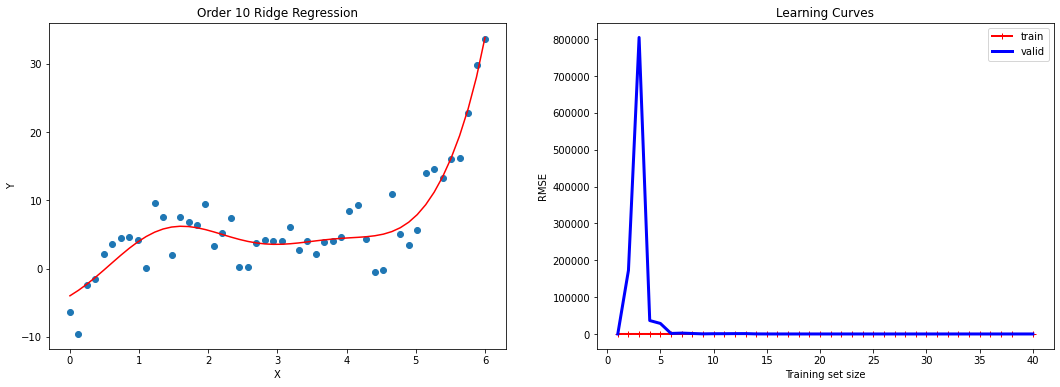

[[ 0.00000000e+00  6.08131614e+00  3.61643183e+00  4.52022709e-01
  -2.01169529e+00 -1.42802143e+00  1.98535193e+00 -8.00867813e-01
   1.55157198e-01 -1.48818767e-02  5.69222102e-04]]


In [156]:
# Make Polynomial Array
X_poly10 = PolynomialFeatures(10)
data10 = X_poly10.fit_transform(X)

# Make data6 from Shuffled Data
data10_shuffle = X_poly10.fit_transform(X_shuffle)

# Select The Model and Train
model10_ridge = Ridge(alpha=0.8)
model10_ridge.fit(data10, Y)

# Make Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), data10_shuffle, Y_shuffle, train_sizes = np.linspace(0.01, 1.0, 40), cv=5, 
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot
fig, axs = plt.subplots(1, 2, figsize = (18,6))
axs[0].plot(X, model10_ridge.predict(data10), 'r')
axs[0].scatter(X, Y)
axs[1].plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
axs[1].plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
# axs[1].set_ylim(0, 20)

# Label plots
axs[0].set_title('Order 10 Ridge Regression')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_title('Learning Curves')
axs[1].set_xlabel('Training set size')
axs[1].set_ylabel('RMSE')
axs[1].legend()

#Show
plt.show()

# Print Coefficients
print(model10_ridge.coef_)

## 7. From your training set select 10 random points, plot these points vs minimal L2 norm interpolating polynomials of the order:  9, 15, 20, 30 (use different colors ).  Comment on the result.

### I assumed that in this problem you wanted the polynomials to be trained on the 10 random points, so that's what I did. With a few tweaks, the polynomials could be trained on the whole data set and compared to the 10 random points.

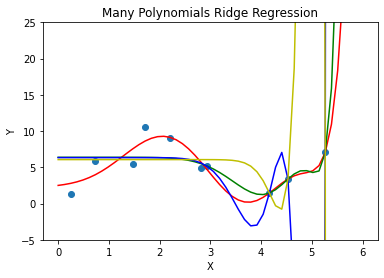

In [165]:
# Select 10 points
X_ten_points = X_shuffle[:10]
Y_ten_points = Y_shuffle[:10]

# Make Polynomial Arrays for Fitting
X_poly9 = PolynomialFeatures(9)
X_poly15 = PolynomialFeatures(15)
X_poly20 = PolynomialFeatures(20)
X_poly30 = PolynomialFeatures(30)
data9 = X_poly9.fit_transform(X_ten_points)
data15 = X_poly15.fit_transform(X_ten_points)
data20 = X_poly20.fit_transform(X_ten_points)
data30 = X_poly30.fit_transform(X_ten_points)

# Make Polynomial Arrays for Plotting
data9_plot = X_poly9.fit_transform(X)
data15_plot = X_poly15.fit_transform(X)
data20_plot = X_poly20.fit_transform(X)
data30_plot = X_poly30.fit_transform(X)

# Select and Train the Models
model9_ridge = Ridge(alpha=0.8)
model9_ridge.fit(data9, Y_ten_points)
model15_ridge = Ridge(alpha=0.8)
model15_ridge.fit(data15, Y_ten_points)
model20_ridge = Ridge(alpha=0.8)
model20_ridge.fit(data20, Y_ten_points)
model30_ridge = Ridge(alpha=0.8)
model30_ridge.fit(data30, Y_ten_points)

# Plot
plt.scatter(X_ten_points, Y_ten_points)
plt.plot(X, model9_ridge.predict(data9_plot), 'r')
plt.plot(X, model15_ridge.predict(data15_plot), 'g')
plt.plot(X, model20_ridge.predict(data20_plot), 'b')
plt.plot(X, model30_ridge.predict(data30_plot), 'y')

# Label plot
plt.title('Many Polynomials Ridge Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-5,25)

#Show
plt.show()

### The polynomials indicate a clear relationship between overfitting and performance. The more overfit the model, the more erratic it is and the worse of a predictor it is.

##  8. Use as a training set just 20 random points, Plot cross validation error vs the order of a polynomial model starting from order 2 and going to order 40.

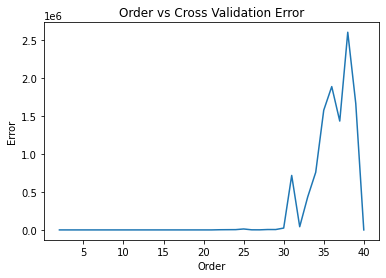

In [172]:
# Make Order Set
orders = np.linspace(2, 40, 39, dtype='int')

# Random Training Data 
X_twenty_points = X_shuffle[:20]
Y_twenty_points = Y_shuffle[:20]

# Make Second Shuffle Data for Cross-Validation
np.random.shuffle(index)
X_shuffle2 = np.array(X)[index]
Y_shuffle2 =  np.array(Y)[index]

# Cross Validation Errors
ridge_rmses = []
for order in orders:
    X_poly = PolynomialFeatures(order)
    data = X_poly.fit_transform(X_twenty_points)
    data_shuffle2 = X_poly.fit_transform(X_shuffle2)
    model_ridge = Ridge(alpha=0.8)
    model_ridge.fit(data, Y_twenty_points)
    mse = np.mean(cross_val_score(model_ridge, data_shuffle2, Y_shuffle2, cv=5, scoring='neg_mean_squared_error'))
    ridge_rmses.append(-mse)

# Plot
plt.plot(orders, ridge_rmses)

# Label plot
plt.title('Order vs Cross Validation Error')
plt.xlabel('Order')
plt.ylabel('Error')
# plt.ylim(0,25)

#Show
plt.show()

### Cross-validation error seems to be relatively low until about 31, where it spikes up greatly. However, the error quickly decreases back down at about 38. This is odd and maybe an example of the double descent curve, but I wouldn't expect the double descent curve to show up until the parameters were much higher than 40.

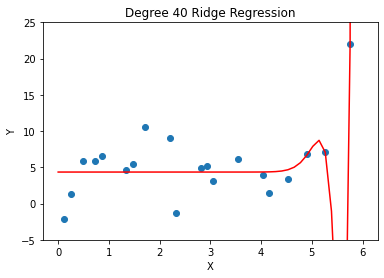

In [170]:
# Make Polynomial Array
X_poly40 = PolynomialFeatures(40)
data40 = X_poly40.fit_transform(X_twenty_points)

# Make Polynomial Arrays for Plotting
data40_plot = X_poly40.fit_transform(X)

# Select The Model and Train
model40_ridge = Ridge(alpha=0.8)
model40_ridge.fit(data40, Y_twenty_points)

# Plot
plt.scatter(X_twenty_points, Y_twenty_points)
plt.plot(X, model40_ridge.predict(data40_plot), 'r')

# Label plots
plt.title('Degree 40 Ridge Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-5,25)
 
#Show
plt.show()

### I was curious to see what the regression would look like with a 40 degree polynomial. This is definitely NOT better than the order 2, 3, or 6 polynomials. Something I tend to notice about overfit polynomials is that they are flat in the beginning (lower x values), but are very accurate with the points at higher x values.